<a href="https://colab.research.google.com/github/alexuqt/neural-networks/blob/main/3_TensorFlow_Chinese_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nRowsRead = 3000 # specify 'None' if want to read whole file
# chinese_mnist_df.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/drive/My Drive/CTTC/archive/chinese_mnist.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'chinese_mnist_df.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head(11)

There are 3000 rows and 5 columns


,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九
5,1,5,10,9,九
6,1,6,10,9,九
7,1,7,10,9,九
8,1,8,10,9,九
9,1,9,10,9,九


In [ ]:
# csv = pd.read_csv('/content/drive/My Drive/CTTC/archive/chinese_mnist.csv')
csv = pd.read_csv('/content/drive/My Drive/CTTC/archive/chinese_mnist.csv', delimiter=',', nrows = nRowsRead)
filename = csv[['suite_id', 'sample_id', 'code']].values

images = [ cv2.imread(f"/content/drive/My Drive/CTTC/archive/data/data/input_{suite_id}_{sample_id}_{code}.jpg") for suite_id, sample_id, code in filename ]
labels = [ [x - 1] for x in csv['code'].values ] # need to compensate to 0-15

In [ ]:
from sklearn.model_selection import train_test_split
images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels)

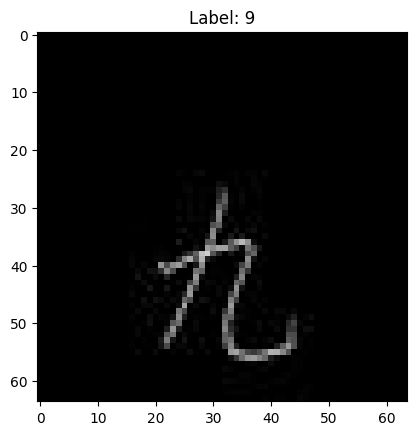

In [ ]:
image_index = 0

# Load the image using OpenCV
image = images[image_index]

# Get the label for the chosen image
label = labels[image_index][0]

# Plot the image
plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()

In [ ]:
OUT_LAYERS = 15

model = models.Sequential()
model.add(layers.Flatten(input_shape=(64, 64, 3)))  # Flatten the input image

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())

# Output layer
model.add(layers.Dense(OUT_LAYERS))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 512)               6291968   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=9,
                    validation_data=(test_images, test_labels))

Epoch 1/9
71/71 [==============================] - 12s 131ms/step - loss: 0.9362 - accuracy: 0.7720 - val_loss: 1.1646 - val_accuracy: 0.7280
Epoch 2/9
71/71 [==============================] - 9s 125ms/step - loss: 0.1407 - accuracy: 0.9671 - val_loss: 0.3595 - val_accuracy: 0.9307
Epoch 3/9
71/71 [==============================] - 8s 107ms/step - loss: 0.0712 - accuracy: 0.9800 - val_loss: 0.2499 - val_accuracy: 0.9267
Epoch 4/9
71/71 [==============================] - 9s 127ms/step - loss: 0.0669 - accuracy: 0.9813 - val_loss: 0.2369 - val_accuracy: 0.9413
Epoch 5/9
71/71 [==============================] - 10s 143ms/step - loss: 0.0861 - accuracy: 0.9738 - val_loss: 0.2413 - val_accuracy: 0.9427
Epoch 6/9
71/71 [==============================] - 9s 126ms/step - loss: 0.0604 - accuracy: 0.9809 - val_loss: 0.2675 - val_accuracy: 0.9333
Epoch 7/9
71/71 [==============================] - 10s 145ms/step - loss: 0.0460 - accuracy: 0.9880 - val_loss: 0.2938 - val_accuracy: 0.9280
Epoch 8/9


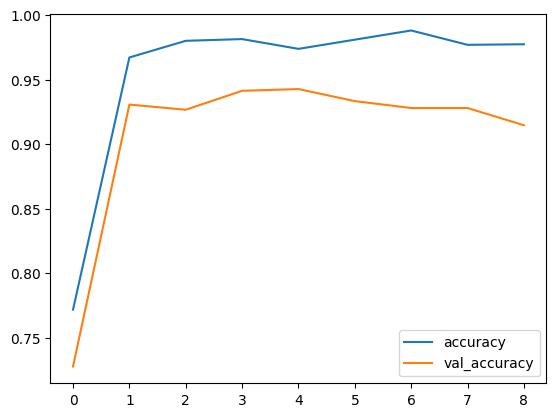

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

24/24 [==============================] - 0s 18ms/step - loss: 0.3320 - accuracy: 0.9147


In [ ]:
test_acc

0.9146666526794434

In [ ]:
model.save("chinese_cnn")